In [1]:
# hide ugly warnings for this time
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# cool seaborn style defaults + edges for histogram bins
sns.set() 
plt.rcParams['patch.force_edgecolor'] = True

%matplotlib inline

# Heavy-tailed distributions e.g. Catalan municipalities

In [2]:
pop_mun_cat_ser = pd.read_csv('data/urbanism_sant_feliu/poblacio_municipis_cat.csv', sep=';', header=5, index_col=False, usecols=['Literal', 'Total'], na_values=['..'], skip_blank_lines=True).dropna()['Total'].astype(int)

Text(0.5,0,'population (in thousands)')

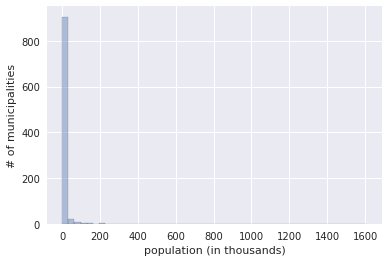

In [3]:
from matplotlib.ticker import FuncFormatter

sns.distplot(pop_mun_cat_ser, kde=False).xaxis.set_major_formatter(FuncFormatter(lambda x, pos: int(x/1000.0)))
# plt.xticks(rotation=45)
plt.ylabel("# of municipalities")
plt.xlabel("population (in thousands)")

It is impossible to get anything out of the plot, let's check it in logarithimic scale

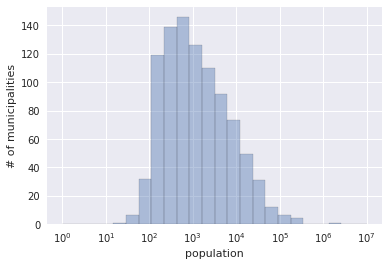

In [4]:
sns.distplot(pop_mun_cat_ser, kde=False, bins=np.logspace(0, 7, num=25))
plt.ylabel("# of municipalities")
plt.xlabel("population")
plt.xscale('log')

Looks like a log-normal distribution (from Gibrat's law), let's see its size-frequency spectra

Text(0.5,0,'population')

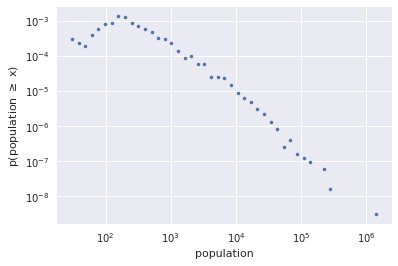

In [5]:
import powerlaw

ax = powerlaw.plot_pdf(pop_mun_cat_ser, linestyle='None', marker='.')
ax.set_ylabel("p(population $\geq$ x)")
ax.set_xlabel("population")

Looks like the tail can be approximated by a power-law (straight line)

Calculating best minimal value for power law fit


Text(0.5,0,'population')

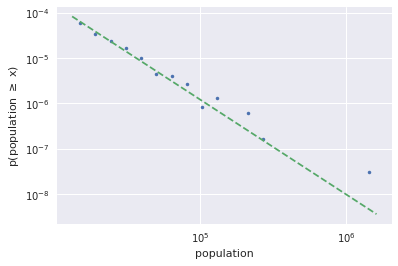

In [6]:
fit = powerlaw.Fit(pop_mun_cat_ser, discrete=True)
ax = fit.plot_pdf(linestyle='None', marker='.')
fit.power_law.plot_pdf(ax=ax, linestyle='--')
ax.set_ylabel("p(population $\geq$ x)")
ax.set_xlabel("population")

In [7]:
print(fit.power_law.xmin)
print(fit.power_law.alpha)

13247.0
2.0909469165462933


For municipalities with more than 13247 inhabitants, the distribution can be approximated by a power law with $P_n \sim \frac{1}{n^\alpha}$ with $\alpha = 2.09$. This is more uneven than Zipf's law $\alpha \approx 1$ . Seems like Barcelona is too much of an outlier